9.11.2020
# Using NumPy, matplotlib and SciPy
## Tutorial 1, Exercise 1: Image manipulation

The goal of this exercise is for you to become familiar with the important
packages NumPy (for n-dimensional array manipulations) and matplotlib (for
MATLAB-like plotting and visualization).
Your task is to load a provided image into a NumPy array and do some basic
manipulations.

You need to replace the ``???`` in the code with the required commands.

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import scipy.interpolate as inter
import math 

In [2]:
plt.ion()

Use ``plt.imread`` to read in ``'tree.jpg'`` as numpy array, select
only the red channel. Check the image dimensions with img.shape.
``img_red`` should contain a 2-dimensional array.
Please note that this is actually a gray scale image and all three
image channels are the same.

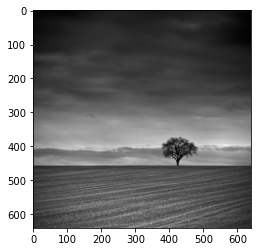

In [7]:
img = plt.imread('tree.jpg')
img.shape
plt.figure(2)
plt.imshow(img)

In [12]:
img_red = img[:, :, 0]
img_red

array([[ 5,  3,  3, ...,  5,  5,  5],
       [ 4,  4,  4, ...,  5,  4,  4],
       [ 3,  4,  5, ...,  5,  5,  4],
       ...,
       [41, 32, 41, ..., 33, 45, 42],
       [40, 44, 55, ..., 33, 46, 59],
       [61, 58, 50, ..., 51, 37, 32]], dtype=uint8)

Show ``img_red`` with ``plt.imshow``:

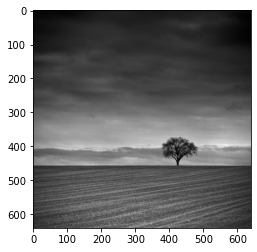

In [11]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')

Using ``plt.imread``, the image values returns unsigned integers between 0 and 255.
**Add a colorbar** to verify the range of values:

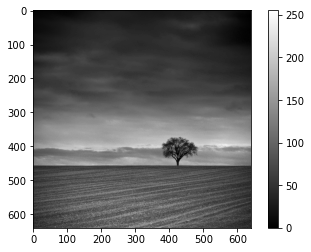

In [104]:
plt.figure(1)
plt.imshow(img_red, cmap='gray')
plt.colorbar()

Create a new NumPy array that is the subarray containing **only the tree** in
the image. Then **invert** the intensity values of the small subimage and call
the resulting array ``img_crop_inv``.

**Use slicing** to select the tree (get the coordinates by looking at the image)!

In [109]:
img_crop = img_red[350:500, 350:500].copy()
img_crop


array([[157, 162, 156, ..., 148, 145, 143],
       [163, 163, 163, ..., 144, 149, 144],
       [169, 166, 166, ..., 149, 147, 149],
       ...,
       [ 96,  87,  96, ..., 110,  96,  96],
       [100,  97, 113, ..., 102,  99, 104],
       [ 69,  80,  76, ..., 104, 103, 106]], dtype=uint8)

Invert the image by subtracting from its maximum. You can find the maximum of ``img`` by
calling ``img.max()`` or ``np.max(img)``.

In [110]:
#img_crop_inv = img.max(img_crop) - img_crop
img_crop_inv = np.max(img_crop) - img_crop

In [111]:
img_crop_inv

array([[ 71,  66,  72, ...,  80,  83,  85],
       [ 65,  65,  65, ...,  84,  79,  84],
       [ 59,  62,  62, ...,  79,  81,  79],
       ...,
       [132, 141, 132, ..., 118, 132, 132],
       [128, 131, 115, ..., 126, 129, 124],
       [159, 148, 152, ..., 124, 125, 122]], dtype=uint8)

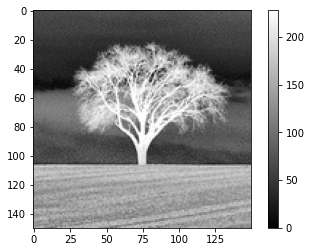

In [112]:
plt.figure(2)
plt.imshow(img_crop_inv, cmap='gray')
plt.colorbar()

**Apply a threshold to** ``img_crop`` (or ``img_crop_inv``) to make a binary image separating the tree from its background!


Define a threshold. You can check whether your threshold is appropriate by looking at the image colorbar!

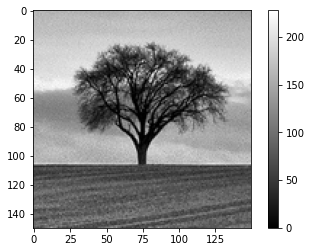

In [113]:
plt.figure(3)
plt.imshow(img_crop, cmap='gray')
plt.colorbar()

In [120]:
threshold = 48
#threshold = 190

Thresholding is possible by a simple ``<`` or ``>`` sign and the threshold value. You do not have to explicitly loop over the image, the greater-than or less-than comparison is **performed for all pixels at once**, yielding a new array with the same size as the input array! 

In [123]:
img_binary = img_crop < threshold
#img_binary = img_crop_inv > threshold

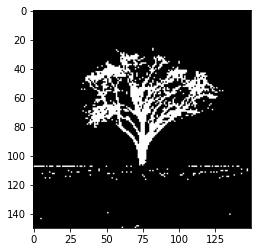

In [124]:
plt.figure(3)
plt.imshow(img_binary, cmap='gray')

Plot a vertical profile line through the tree of ``img_red``
**Select a column of the image via slicing.** Your result ``line_tree`` should be a
1D array of the shape ``(640,)``.

In [126]:
line_tree = img_red[:, 430]
line_tree.shape

(640,)

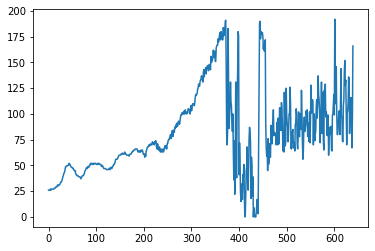

In [127]:
plt.figure(4)
plt.plot(line_tree)

Generate a $400 \times 400$ matrix ``img_seg`` that consists only of zeros:

In [128]:
img_seg = np.zeros((400, 400))
cs = img_crop.shape
ss = img_seg.shape
print(cs, ss)

(150, 150) (400, 400)


In [129]:
ss[0]

400

In [136]:
center_y = math.floor(ss[0]*0.5)
center_x = math.floor(ss[1]*0.5)
height = math.floor(cs[0]*0.5)
width = math.floor(cs[1]*0.5)

#center_y = ss[0]//2 To make int instead of float
#center_x = ss[1]//2 To make int instead of float
#height = cs[0]//2 To make int instead of float
#width = cs[1]//2 To make int instead of float


In [131]:
print(center_y, center_x, height, width)

200 200 75 75


Place the subarray containing just the tree (``img_crop``) in the center of ``img_seg``:

In [132]:
#img_seg[146:254,  135: 265] = img_crop
img_seg[(center_y-height):(center_y + height), (center_x - width): (center_x + width)] = img_crop

Have a look at img_seg with ``plt.imshow``:

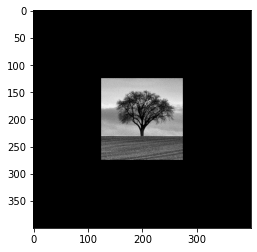

In [133]:
plt.figure(5)
plt.imshow(img_seg, cmap='gray')

Use the function ``scipy.ndimage.rotate`` (here called ``nd.rotate`` because of the way we named our imports) to **rotate ``img_seg`` by 45 degrees**.
Use ``nd.rotate?`` to see the function definition in IPython / IPython notebook or
``help(nd.rotate)`` in the Python interpreter -- or do the same from Spyder.

In [99]:
nd.rotate?


In [102]:
angle_rot = 45
img_rot = nd.rotate(img_seg, angle_rot, reshape = False)

Check that the shape of ``img_rot`` is the same as for img_seg, if not look at
the additional paramters of the ``nd.rotate`` function.

(400, 400)


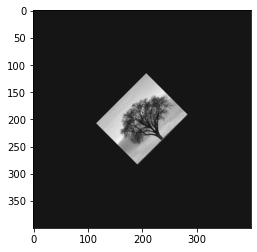

In [103]:
plt.figure(6)
plt.imshow(img_rot, cmap='gray')

print(img_rot.shape)

In [134]:
56//8


7

In [135]:
56/8


7.0